In [1]:
import numpy as np
import pandas as pd

Reading the clean X train data

In [2]:
X_train=pd.read_csv("/content/drive/MyDrive/NN Project/X_TRAIN.csv")

In [3]:
X_train.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_day,created_mth,store_primary_category,Afternoon,Early Morning,Evening,Night
0,2.0,5.0,2.0,1520.0,2.0,425.0,8.0,8.0,10.0,28,1,0.029714,0,0,1,0
1,4.0,3.0,5.0,5275.0,5.0,595.0,77.0,73.0,131.0,16,2,0.012067,0,1,0,0
2,2.0,4.0,2.0,1084.0,2.0,389.0,121.0,108.0,161.0,30,1,0.017571,0,1,0,0
3,2.0,3.0,4.0,963.0,3.0,165.0,43.0,33.0,49.0,17,2,0.005783,0,0,1,0
4,6.0,5.0,3.0,1050.0,1.0,350.0,36.0,35.0,42.0,27,1,0.003066,0,1,0,0


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157870 entries, 0 to 157869
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 157870 non-null  float64
 1   order_protocol            157870 non-null  float64
 2   total_items               157870 non-null  float64
 3   subtotal                  157870 non-null  float64
 4   num_distinct_items        157870 non-null  float64
 5   min_item_price            157870 non-null  float64
 6   total_onshift_partners    157870 non-null  float64
 7   total_busy_partners       157870 non-null  float64
 8   total_outstanding_orders  157870 non-null  float64
 9   created_day               157870 non-null  int64  
 10  created_mth               157870 non-null  int64  
 11  store_primary_category    157870 non-null  float64
 12  Afternoon                 157870 non-null  int64  
 13  Early Morning             157870 non-null  i

In [5]:
X_train.isnull().sum()

,0
market_id,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
total_onshift_partners,0
total_busy_partners,0
total_outstanding_orders,0
created_day,0


Reading the Target data for training

In [6]:
y_train=pd.read_csv("/content/drive/MyDrive/NN Project/Y_TRAIN.csv")

In [7]:
y_train.head()

,delivery_time
0,42.316667
1,75.000000
2,38.566667
3,31.616667
4,37.833333


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
XTrain,Xval,YTrain,Yval=train_test_split(X_train,y_train,random_state=88)

In [10]:
print(XTrain.shape)
print(Xval.shape)
print(YTrain.shape)
print(Yval.shape)

(118402, 16)
(39468, 16)
(118402, 1)
(39468, 1)


We need to normalize the data so that it can be used in model training

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaling=StandardScaler()

In [13]:
X_Train_scaled=scaling.fit_transform(XTrain)

In [14]:
X_Train_scaled.shape

(118402, 16)

Similarly we will normalize the validation data as well

In [15]:
X_val_scaled=scaling.transform(Xval)

In [16]:
X_val_scaled.shape

(39468, 16)

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense,BatchNormalization,Input,Dropout

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
def baseline_model():
  model=Sequential()
  model.add(Dense(512,activation='relu',kernel_initializer='glorot_uniform',input_shape=(16,),name='Hidden_Layer1'))
  model.add(Dense(256,activation='relu',kernel_initializer='glorot_uniform',name='Hidden_Layer2'))
  model.add(Dense(128,activation='relu',kernel_initializer='glorot_uniform',name='Hidden_Layer3'))
  model.add(Dense(64,activation='relu',kernel_initializer='glorot_uniform',name='Hidden_Layer4'))
  model.add(Dense(32,activation='relu',kernel_initializer='glorot_uniform',name='Hidden_Layer5'))
  model.add(Dense(16,activation='relu',kernel_initializer='glorot_uniform',name='Hidden_Layer6'))
  model.add(Dense(1,name='Output_Layer'))
  return model

In [43]:
base_model=baseline_model()

In [44]:
base_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)                │ (None, 512)                 │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer4 (Dense)                │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer5 (Dense)                │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer6 (Dense)                │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,809 (718.00 KB)

 Trainable params: 183,809 (718.00 KB)

 Non-trainable params: 0 (0.00 B)

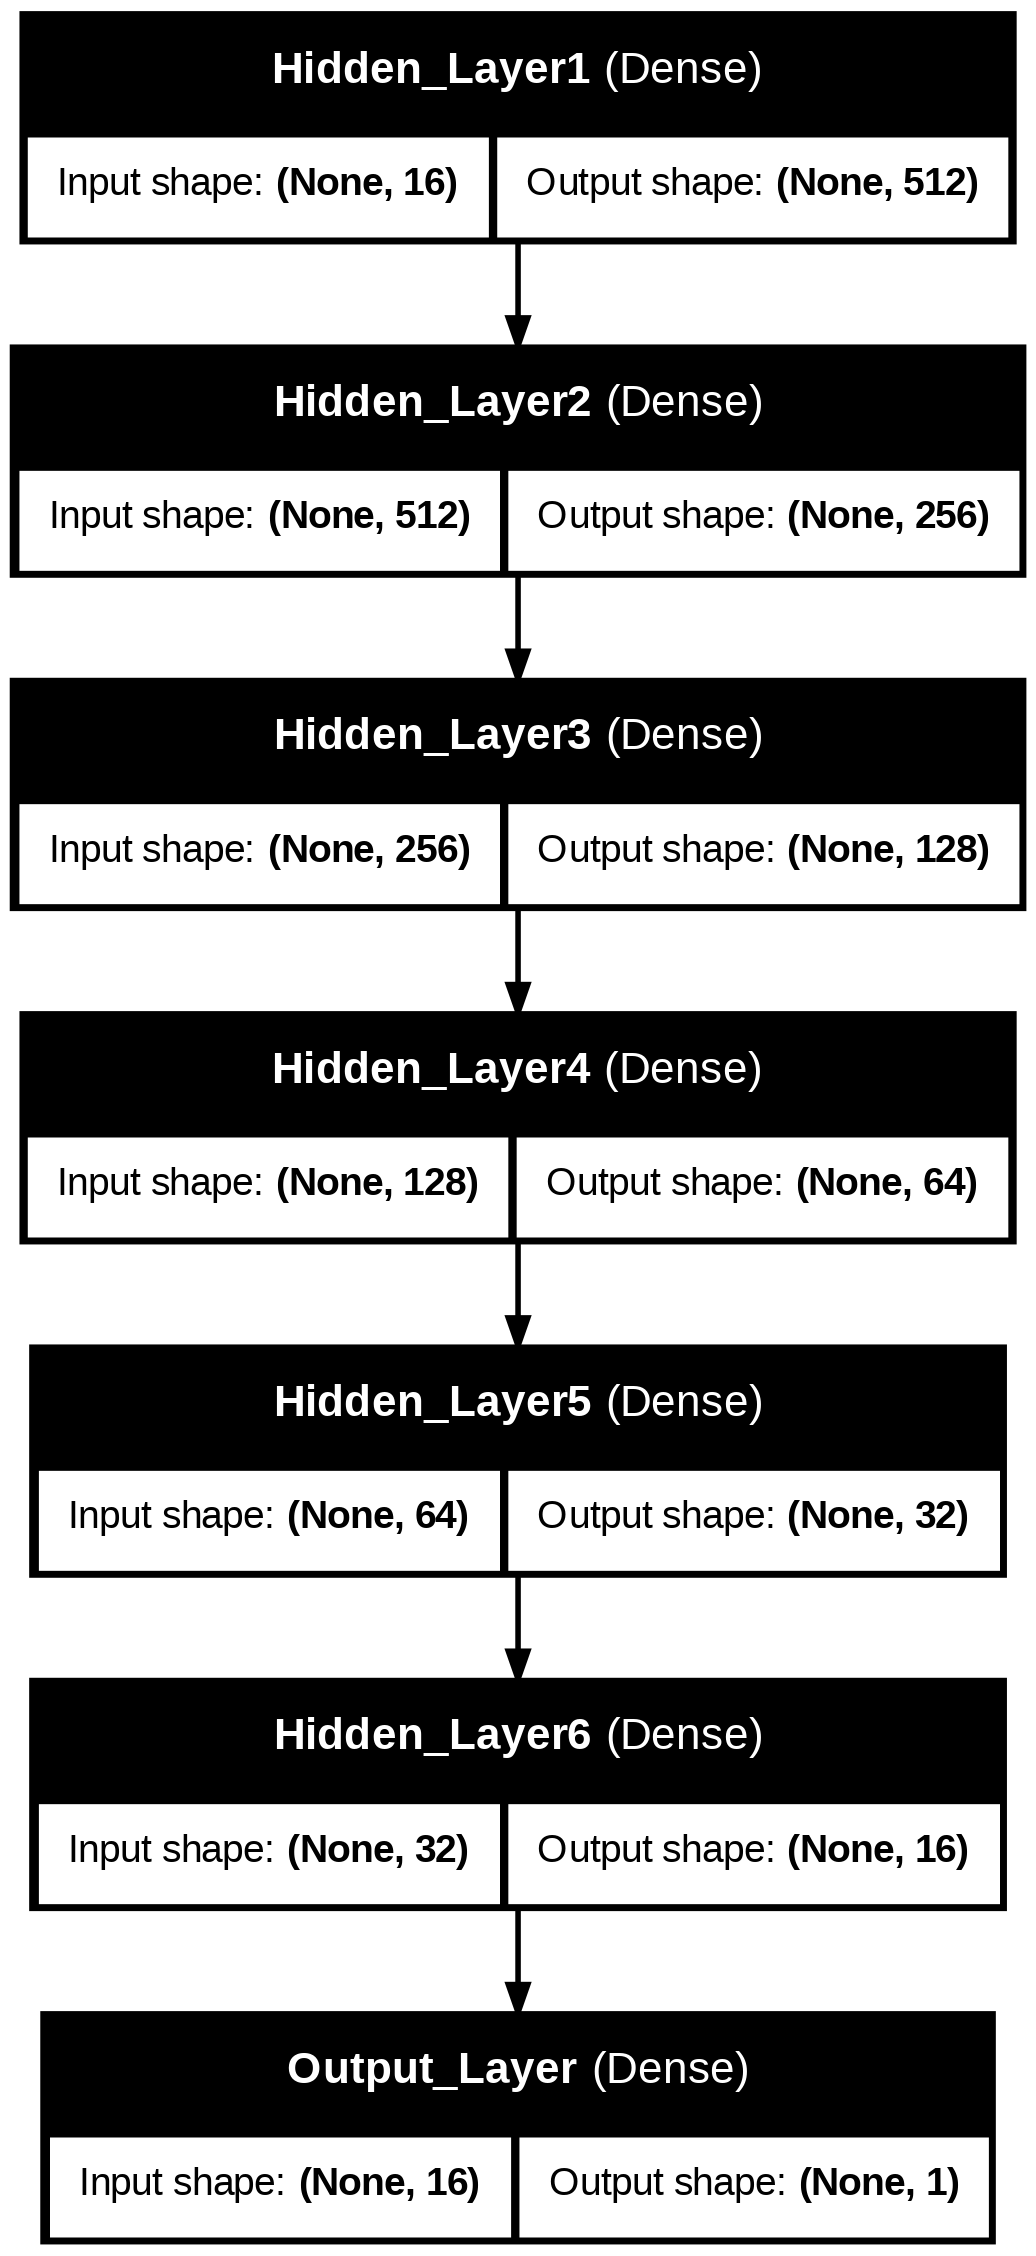

In [45]:
from tensorflow.keras.utils import plot_model

plot_model(base_model,
    to_file='model.png',
    show_shapes=True, show_layer_names=True)

In [46]:
base_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['root_mean_squared_error','R2Score'])

In [48]:
base_history=base_model.fit(X_Train_scaled,YTrain,batch_size=256,epochs=50,verbose=1,validation_data=(X_val_scaled,Yval))

Epoch 1/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - R2Score: 0.2050 - loss: 233.6557 - root_mean_squared_error: 15.2854 - val_R2Score: 0.2105 - val_loss: 229.1537 - val_root_mean_squared_error: 15.1378
Epoch 2/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - R2Score: 0.2095 - loss: 232.3470 - root_mean_squared_error: 15.2425 - val_R2Score: 0.2138 - val_loss: 228.2093 - val_root_mean_squared_error: 15.1066
Epoch 3/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - R2Score: 0.2126 - loss: 231.4288 - root_mean_squared_error: 15.2123 - val_R2Score: 0.2168 - val_loss: 227.3355 - val_root_mean_squared_error: 15.0776
Epoch 4/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - R2Score: 0.2150 - loss: 230.7215 - root_mean_squared_error: 15.1891 - val_R2Score: 0.2189 - val_loss: 226.7311 - val_root_mean_squared_error: 15.0576
Epoch 5/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - R2Score: 0.2172 - loss: 230.0929 - root_mean_squared_error: 15.1684 - val_R2Score: 0.2211 - val_loss: 226.0819 - val_root_m

In [49]:
base_history.history.keys()

dict_keys(['R2Score', 'loss', 'root_mean_squared_error', 'val_R2Score', 'val_loss', 'val_root_mean_squared_error'])

In [50]:
epochs = base_history.epoch
loss = base_history.history["loss"]
train_accuracy=base_history.history["R2Score"]
val_loss = base_history.history["val_loss"]
val_accuracy=base_history.history["val_R2Score"]

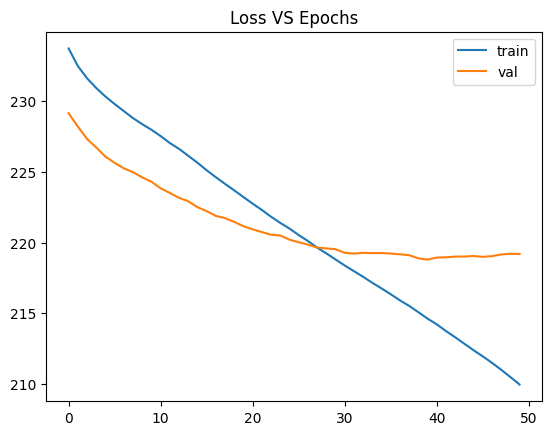

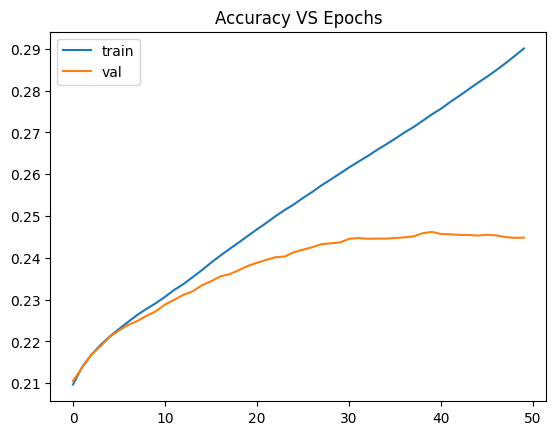

In [51]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, train_accuracy, label="train")
plt.plot(epochs, val_accuracy, label="val")
plt.legend()
plt.title("Accuracy VS Epochs")
plt.show()

# Validation Loss dropped to some extend and it started to increase after that

# we can see the validation graph is flattening out, so we will do LR decay option

In [54]:
LR_decay=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=5, min_lr=0.00001)


In [55]:
base_history=base_model.fit(X_Train_scaled,YTrain,batch_size=256,epochs=50,verbose=1,validation_data=(X_val_scaled,Yval),callbacks=[LR_decay])

Epoch 1/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - R2Score: 0.2867 - loss: 209.6634 - root_mean_squared_error: 14.4793 - val_R2Score: 0.2451 - val_loss: 219.1306 - val_root_mean_squared_error: 14.8031 - learning_rate: 0.0010
Epoch 2/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - R2Score: 0.2890 - loss: 208.9784 - root_mean_squared_error: 14.4556 - val_R2Score: 0.2439 - val_loss: 219.4733 - val_root_mean_squared_error: 14.8146 - learning_rate: 0.0010
Epoch 3/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - R2Score: 0.2904 - loss: 208.5599 - root_mean_squared_error: 14.4412 - val_R2Score: 0.2432 - val_loss: 219.6594 - val_root_mean_squared_error: 14.8209 - learning_rate: 0.0010
Epoch 4/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - R2Score: 0.2921 - loss: 208.0511 - root_mean_squared_error: 14.4235 - val_R2Score: 0.2434 - val_loss: 219.6087 - val_root_mean_squared_error: 14.8192 - learning_rate: 0.0010
Epoch 5/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - R2Score: 0.2941 - loss: 207.4

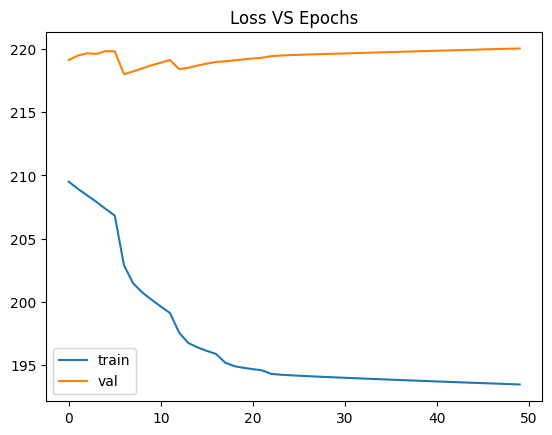

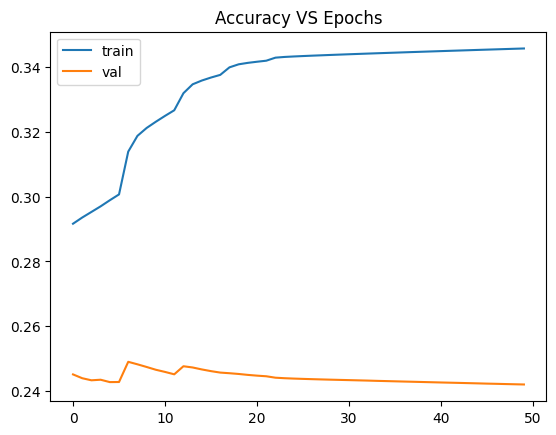

In [56]:
epochs = base_history.epoch
loss = base_history.history["loss"]
train_accuracy=base_history.history["R2Score"]
val_loss = base_history.history["val_loss"]
val_accuracy=base_history.history["val_R2Score"]

import matplotlib.pyplot as plt
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, train_accuracy, label="train")
plt.plot(epochs, val_accuracy, label="val")
plt.legend()
plt.title("Accuracy VS Epochs")
plt.show()

We will introduce early callbacks and save the best weights

Early stopping set

In [69]:
EarlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [62]:
def baseline_model():

  model = Sequential()
  # Input layer
  model.add(Input(shape=(16,)))

  # Hidden layers with BatchNormalization
  hidden_units = [512, 256, 256, 128, 64, 32, 16]  # Number of neurons in each hidden layer
  for i, units in enumerate(hidden_units):
      model.add(Dense(units, activation='relu', kernel_initializer='glorot_uniform', name=f'Hidden_Layer{i+1}'))
      model.add(BatchNormalization())

    # Output layer
  model.add(Dense(1, name='Output_Layer'))  # No activation for regression

  return model

In [63]:
batch_model=baseline_model()

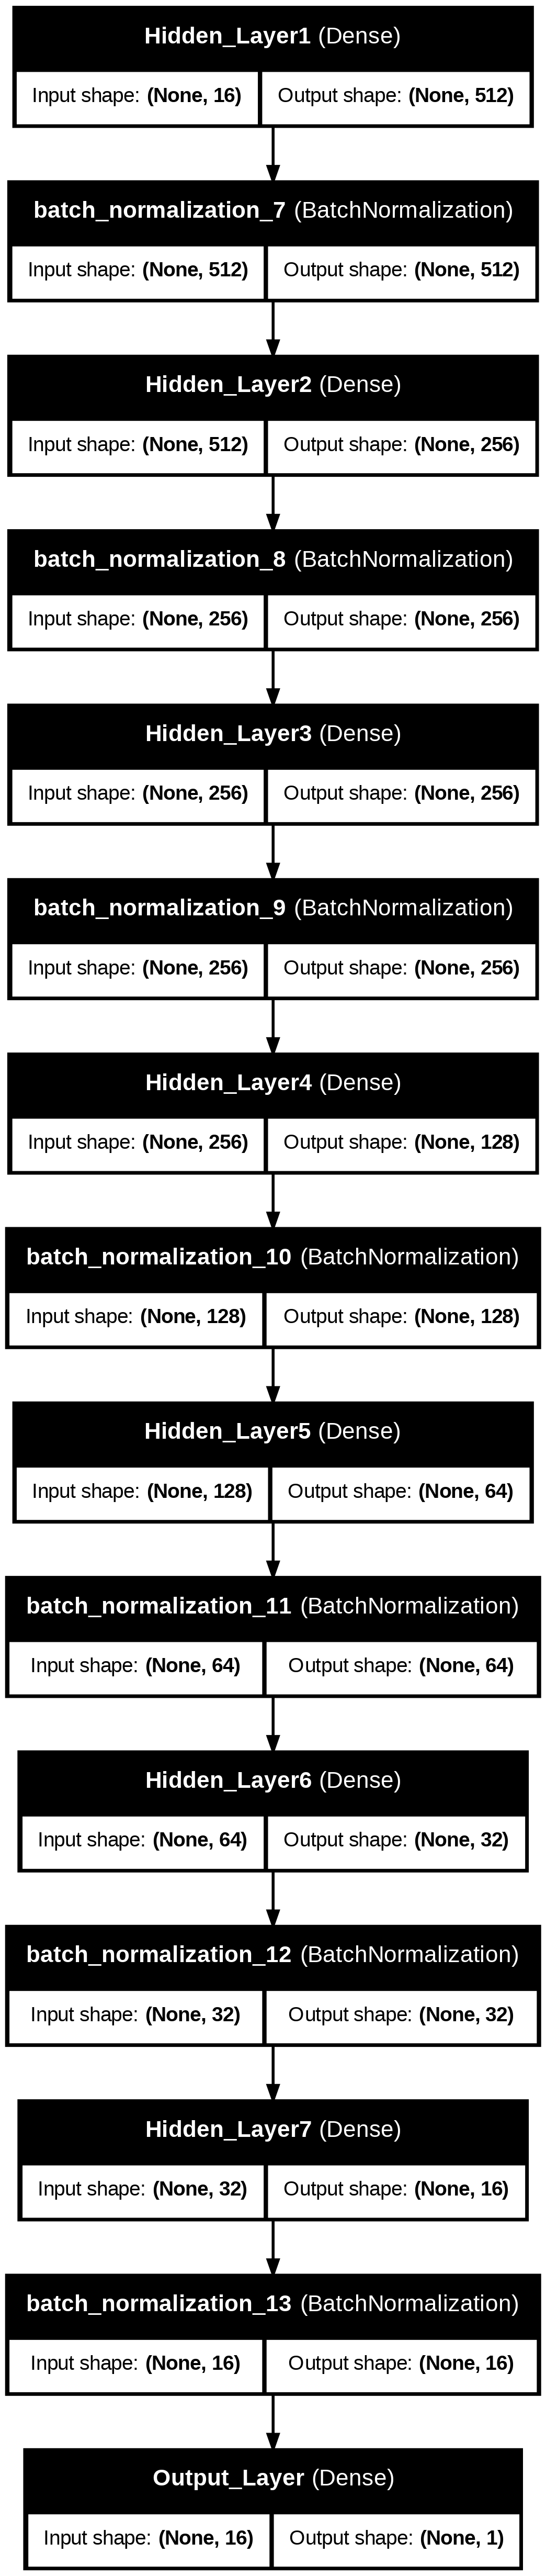

In [64]:

plot_model(batch_model,
    to_file='model.png',
    show_shapes=True, show_layer_names=True)

In [65]:
batch_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)                │ (None, 512)                 │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer3 (Dense)                │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer4 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer5 (Dense)                │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer6 (Dense)                │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer7 (Dense)                │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 254,657 (994.75 KB)

 Trainable params: 252,129 (984.88 KB)

 Non-trainable params: 2,528 (9.88 KB)

In [67]:
batch_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['root_mean_squared_error','R2Score'])

In [70]:
batch_model_history=batch_model.fit(X_Train_scaled,YTrain,batch_size=256,epochs=100,verbose=1,validation_data=(X_val_scaled,Yval),callbacks=[LR_decay,EarlyStoppingCallback])

Epoch 1/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - R2Score: -3.7414 - loss: 1391.7994 - root_mean_squared_error: 37.2388 - val_R2Score: -1.2075 - val_loss: 640.7354 - val_root_mean_squared_error: 25.3127 - learning_rate: 0.0010
Epoch 2/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - R2Score: -0.5635 - loss: 458.8801 - root_mean_squared_error: 21.3738 - val_R2Score: 0.1219 - val_loss: 254.8789 - val_root_mean_squared_error: 15.9649 - learning_rate: 0.0010
Epoch 3/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - R2Score: 0.1913 - loss: 237.6713 - root_mean_squared_error: 15.4159 - val_R2Score: 0.2186 - val_loss: 226.8114 - val_root_mean_squared_error: 15.0603 - learning_rate: 0.0010
Epoch 4/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - R2Score: 0.2300 - loss: 226.3098 - root_mean_squared_error: 15.0431 - val_R2Score: 0.2283 - val_loss: 224.0007 - val_root_mean_squared_error: 14.9667 - learning_rate: 0.0010
Epoch 5/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - R2Score: 0.2344

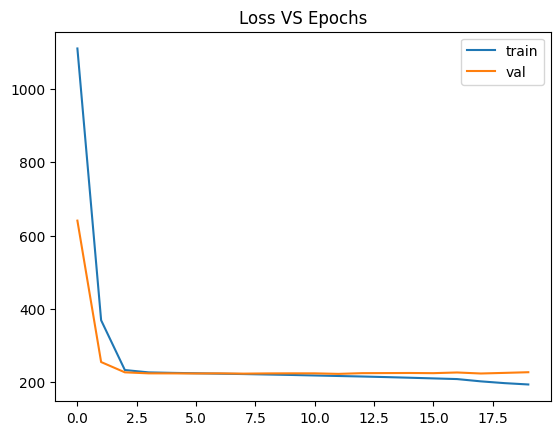

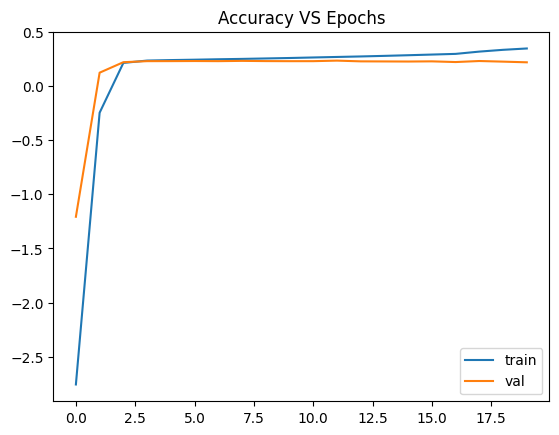

In [71]:
epochs = batch_model_history.epoch
loss = batch_model_history.history["loss"]
train_accuracy=batch_model_history.history["R2Score"]
val_loss = batch_model_history.history["val_loss"]
val_accuracy=batch_model_history.history["val_R2Score"]

import matplotlib.pyplot as plt
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, train_accuracy, label="train")
plt.plot(epochs, val_accuracy, label="val")
plt.legend()
plt.title("Accuracy VS Epochs")
plt.show()

In [73]:
def baseline_model():

  model = Sequential()
  # Input layer
  model.add(Input(shape=(16,)))

  # Hidden layers with BatchNormalization
  hidden_units = [512,512,256, 256, 128,128, 64, 32]  # Number of neurons in each hidden layer
  for i, units in enumerate(hidden_units):
      model.add(Dense(units, activation='relu', kernel_initializer='glorot_uniform', name=f'Hidden_Layer{i+1}'))
      model.add(BatchNormalization())
      model.add(Dropout(0.2))
  model.add(Dense(16,activation='relu', kernel_initializer='glorot_uniform',name='Hidden_Layer9'))
    # Output layer
  model.add(Dense(1, name='Output_Layer'))  # No activation for regression

  return model

In [74]:
drop_model=baseline_model()

In [75]:
drop_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)                │ (None, 512)                 │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer3 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer4 (Dense)                │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer5 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer6 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 536,321 (2.05 MB)

 Trainable params: 532,545 (2.03 MB)

 Non-trainable params: 3,776 (14.75 KB)

Transfering the weights learned in previous model

In [78]:
for new_layer, base_layer in zip(drop_model.layers, batch_model.layers):
    # Check if both are Dense layers and have the same number of neurons
    if isinstance(new_layer, layers.Dense) and isinstance(base_layer, layers.Dense):
        if new_layer.units == base_layer.units:  # Ensure the number of neurons match
            new_layer.set_weights(base_layer.get_weights())

In [79]:
drop_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['root_mean_squared_error','R2Score'])
drop_model_history=drop_model.fit(X_Train_scaled,YTrain,batch_size=256,epochs=100,verbose=1,validation_data=(X_val_scaled,Yval),callbacks=[LR_decay,EarlyStoppingCallback])

Epoch 1/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - R2Score: -3.9513 - loss: 1449.4862 - root_mean_squared_error: 37.4332 - val_R2Score: 0.1047 - val_loss: 259.8593 - val_root_mean_squared_error: 16.1202 - learning_rate: 0.0010
Epoch 2/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - R2Score: 0.0205 - loss: 287.8565 - root_mean_squared_error: 16.9660 - val_R2Score: 0.1949 - val_loss: 233.6803 - val_root_mean_squared_error: 15.2866 - learning_rate: 0.0010
Epoch 3/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - R2Score: 0.0777 - loss: 271.0595 - root_mean_squared_error: 16.4634 - val_R2Score: 0.2106 - val_loss: 229.1278 - val_root_mean_squared_error: 15.1370 - learning_rate: 0.0010
Epoch 4/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - R2Score: 0.0905 - loss: 267.3108 - root_mean_squared_error: 16.3493 - val_R2Score: 0.2131 - val_loss: 228.4067 - val_root_mean_squared_error: 15.1131 - learning_rate: 0.0010
Epoch 5/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - R2Score: 0.1035 -

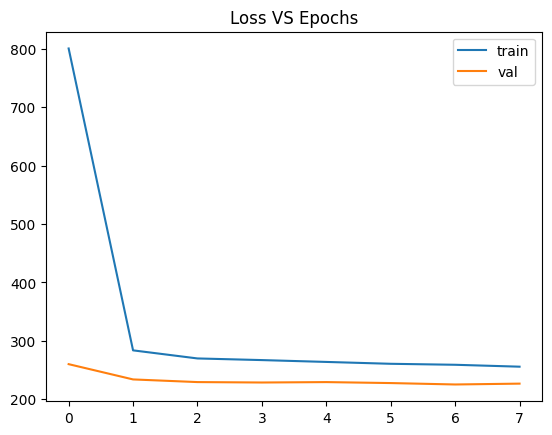

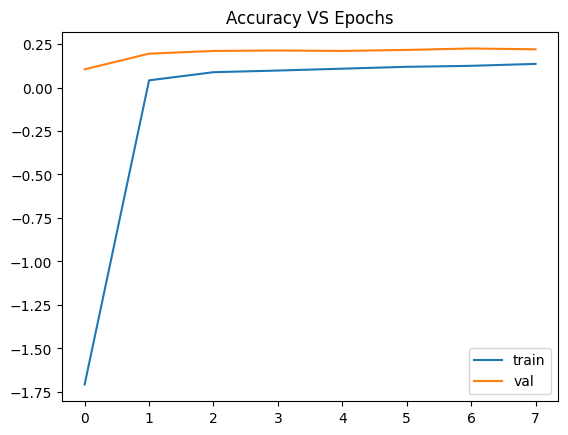

In [80]:
epochs = drop_model_history.epoch
loss = drop_model_history.history["loss"]
train_accuracy=drop_model_history.history["R2Score"]
val_loss = drop_model_history.history["val_loss"]
val_accuracy=drop_model_history.history["val_R2Score"]

import matplotlib.pyplot as plt
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, train_accuracy, label="train")
plt.plot(epochs, val_accuracy, label="val")
plt.legend()
plt.title("Accuracy VS Epochs")
plt.show()

we will add model check point as well. to save the best model

In [85]:
ModelCheckpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/NN Project/porter_model.keras',
                                                             monitor='val_loss',
                                                             save_best_only=True,
                                                             mode='min',
                                                             )

In [ ]:
EarlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [ ]:
LR_decay=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=5, min_lr=0.00001)

We will regularizer as well

In [87]:
def baseline_model():

  model = Sequential()
  # Input layer
  model.add(Input(shape=(16,)))

  # Hidden layers with BatchNormalization
  hidden_units = [512,512,256, 256, 128,128, 64, 32]  # Number of neurons in each hidden layer
  for i, units in enumerate(hidden_units):
      model.add(Dense(units, activation='relu', kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(l2=1e-6), name=f'Hidden_Layer{i+1}'))
      model.add(BatchNormalization())
      model.add(Dropout(0.2))
  model.add(Dense(16,activation='relu', kernel_initializer='glorot_uniform',name='Hidden_Layer9'))
    # Output layer
  model.add(Dense(1, name='Output_Layer'))  # No activation for regression

  return model

In [88]:
reg_model=baseline_model()

In [89]:
reg_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)                │ (None, 512)                 │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer3 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer4 (Dense)                │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer5 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer6 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 536,321 (2.05 MB)

 Trainable params: 532,545 (2.03 MB)

 Non-trainable params: 3,776 (14.75 KB)

In [90]:
for new_layer, base_layer in zip(reg_model.layers, drop_model.layers):
    # Check if both are Dense layers and have the same number of neurons
    if isinstance(new_layer, layers.Dense) and isinstance(base_layer, layers.Dense):
        if new_layer.units == base_layer.units:  # Ensure the number of neurons match
            new_layer.set_weights(base_layer.get_weights())

In [91]:
reg_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['root_mean_squared_error','R2Score'])
reg_model_history=reg_model.fit(X_Train_scaled,YTrain,batch_size=256,epochs=100,verbose=1,validation_data=(X_val_scaled,Yval),callbacks=[LR_decay,EarlyStoppingCallback,ModelCheckpointCallback])

Epoch 1/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - R2Score: -0.0796 - loss: 316.8866 - root_mean_squared_error: 17.7853 - val_R2Score: 0.1559 - val_loss: 244.9982 - val_root_mean_squared_error: 15.6524 - learning_rate: 0.0010
Epoch 2/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - R2Score: 0.0778 - loss: 271.0246 - root_mean_squared_error: 16.4624 - val_R2Score: 0.2112 - val_loss: 228.9651 - val_root_mean_squared_error: 15.1315 - learning_rate: 0.0010
Epoch 3/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - R2Score: 0.0954 - loss: 265.8655 - root_mean_squared_error: 16.3050 - val_R2Score: 0.1967 - val_loss: 233.1745 - val_root_mean_squared_error: 15.2700 - learning_rate: 0.0010
Epoch 4/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - R2Score: 0.1144 - loss: 260.2704 - root_mean_squared_error: 16.1325 - val_R2Score: 0.2274 - val_loss: 224.2517 - val_root_mean_squared_error: 14.9750 - learning_rate: 0.0010
Epoch 5/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - R2Score: 0.1274 - 

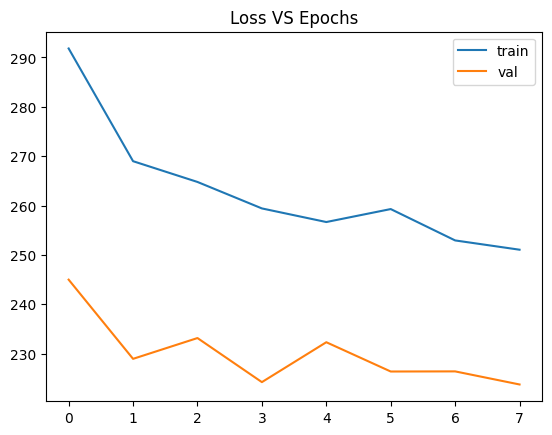

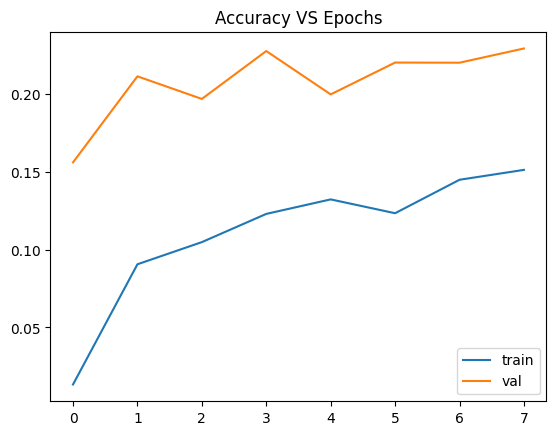

In [92]:
epochs = reg_model_history.epoch
loss = reg_model_history.history["loss"]
train_accuracy=reg_model_history.history["R2Score"]
val_loss = reg_model_history.history["val_loss"]
val_accuracy=reg_model_history.history["val_R2Score"]

import matplotlib.pyplot as plt
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, train_accuracy, label="train")
plt.plot(epochs, val_accuracy, label="val")
plt.legend()
plt.title("Accuracy VS Epochs")
plt.show()

In [95]:
model = load_model('/content/drive/MyDrive/NN Project/porter_model.keras')

In [94]:
from tensorflow.keras.models import load_model

In [96]:
from google.colab import files
files.download('/content/drive/MyDrive/NN Project/porter_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
# Correct the filename to end with .weights.h5
reg_model.save_weights('/content/drive/MyDrive/NN Project/porter_model_weights.weights.h5')

In [99]:
from google.colab import files

# Download the weights file
files.download('/content/drive/MyDrive/NN Project/porter_model_weights.weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
import pickle

# Save the scaler object using pickle
with open('scaling_weights.pkl', 'wb') as f:
    pickle.dump(scaling, f)

In [100]:
input1=[[2.00000000e+00, 5.00000000e+00, 2.00000000e+00, 1.52000000e+03,
        2.00000000e+00, 4.25000000e+02, 8.00000000e+00, 8.00000000e+00,
        1.00000000e+01, 2.80000000e+01, 1.00000000e+00, 2.97143219e-02,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]]

In [101]:
input2=scaling.transform(input1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [102]:
reg_model.predict(input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


array([[38.608257]], dtype=float32)

In [104]:
from google.colab import files
files.download('scaling_weights.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Prediction Check

In [105]:
input1=[[2.00000000e+00, 5.00000000e+00, 2.00000000e+00, 1.52000000e+03,
        2.00000000e+00, 4.25000000e+02, 8.00000000e+00, 8.00000000e+00,
        1.00000000e+01, 2.80000000e+01, 1.00000000e+00, 2.97143219e-02,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.00000000e+00, 3.00000000e+00, 5.00000000e+00, 5.27500000e+03,
        5.00000000e+00, 5.95000000e+02, 7.70000000e+01, 7.30000000e+01,
        1.31000000e+02, 1.60000000e+01, 2.00000000e+00, 1.20668905e-02,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00]]

In [106]:
input2=scaling.transform(input1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [107]:
reg_model.predict(input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step


array([[38.608257],
       [53.15106 ]], dtype=float32)